# Image Classification using Convolutional Neural Network

In [31]:
#Importing Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# Load the dataset
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [33]:
# There are 50000 training images and 10000 test images

In [34]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [35]:
# the y_train is a 2D array, for our classification 1D array is required
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
# Plot the images
def plot_sample(x,y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

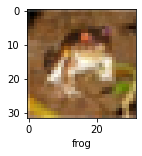

In [10]:
plot_sample(x_train, y_train, 0)

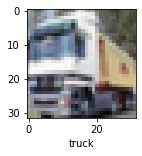

In [11]:
plot_sample(x_train, y_train, 1)

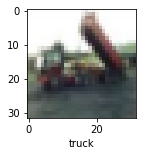

In [12]:
plot_sample(x_train, y_train, 2)

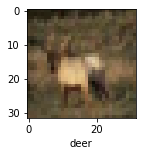

In [13]:
plot_sample(x_train, y_train, 3)

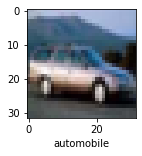

In [14]:
plot_sample(x_train, y_train, 4)

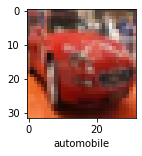

In [15]:
plot_sample(x_train, y_train, 5)

In [36]:
# Normalizing the training data

In [16]:
x_train = x_train/255
x_test = x_test/255

In [37]:
# Build Simple Artifical Neural Network for image classification

In [17]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.9311 - accuracy: 0.3047
Epoch 2/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.6524 - accuracy: 0.4170
Epoch 3/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5491 - accuracy: 0.4528
Epoch 4/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4876 - accuracy: 0.4736
Epoch 5/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4344 - accuracy: 0.4952


In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.62      0.55      1000
           1       0.70      0.46      0.55      1000
           2       0.41      0.32      0.36      1000
           3       0.32      0.45      0.37      1000
           4       0.43      0.47      0.45      1000
           5       0.40      0.33      0.36      1000
           6       0.62      0.37      0.46      1000
           7       0.60      0.51      0.56      1000
           8       0.58      0.67      0.62      1000
           9       0.48      0.67      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [ ]:
# Build a CNN to train our image

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6669 - accuracy: 0.3953
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1453 - accuracy: 0.6012
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9722 - accuracy: 0.6594
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8905 - accuracy: 0.6884
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8016 - accuracy: 0.7226
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7425 - accuracy: 0.7429
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6810 - accuracy: 0.7628
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6240 - accuracy: 0.7832
Epoch 9/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5825 - accuracy: 0.7968
Epoch 10/10
1563/1563 [==============================] - 20s 13m

In [ ]:
# With CNN, at the end 5 epochs, accuracy was at around 70.28% which is a significant improvement over ANN. CNN's are best for image classification. Also computation is much less compared to simple ANN

In [22]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9708 - accuracy: 0.6917


[0.9707618951797485, 0.6916999816894531]

In [24]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[1.63621716e-02, 2.75367517e-02, 9.68908053e-03, 5.38088262e-01,
        2.75371643e-03, 1.76275626e-01, 4.16446431e-03, 1.65485926e-05,
        2.25043267e-01, 7.00890960e-05],
       [1.47053988e-05, 1.88806863e-03, 1.92219190e-07, 3.15201687e-09,
        3.11722315e-11, 8.14667084e-11, 5.36277134e-10, 1.37697345e-11,
        9.98095095e-01, 1.92766697e-06],
       [2.74195503e-02, 1.87449288e-02, 7.98007241e-04, 6.49131835e-04,
        1.64334066e-04, 7.77230234e-05, 2.06355035e-05, 1.00434991e-04,
        9.46696520e-01, 5.32868598e-03],
       [1.47074088e-01, 2.65617273e-03, 4.09055734e-03, 3.27783870e-04,
        1.97504275e-03, 4.57897704e-06, 1.47297133e-05, 2.63701022e-05,
        8.43653500e-01, 1.77063383e-04],
       [9.75044713e-07, 2.62498343e-05, 1.45163061e-02, 4.01130784e-03,
        4.57181148e-02, 6.30216906e-04, 9.34972525e-01, 9.35690423e-07,
        1.23311416e-04, 1.04537776e-07]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [26]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [27]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

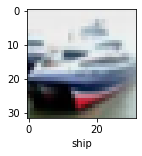

In [29]:
plot_sample(x_test, y_test,1)

In [30]:
classes[y_classes[1]]

'ship'